# Bellabeat Case Study: How Can a Wellness Technology Company Play It Smart?

This capstone project is a case study from the Google Data Analytics Course. The analysis is performed by following the 6 steps of Data Analysis: Ask, Prepare, Process, Analyse, Share and Act, as taught by the course.

## **Scenario**

My role is that of a junior data analyst who joined the Bellabeat marketing analytics team six months ago. I have been asked to focus on one of Bellabeat's products and analyse smart device data to gain insight into how customers are using their smart devices. My insights and hihg-level recommendations will help guide marketing strategy for the company, and the analysis will be presented to the Bellabeat executive team.

### **About the company**

Bellabeat is a high-tech company that manufactures health-focused smart products for women. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

## **1. Ask**

**1. Identify the business task.**

- Analyse smart device usage data to gain insights on how people are using their smart devices that can uncover potential opportunities and generate high-level recommendations to help build marketing strategies for future growth.

**2. Consider key stakeholders.**

- Primary stakeholders: Urška Sršen and Sando Mur, executive team.
- Secondary stakeholders: Bellabeat marketing analytics team.



## **2. Prepare**

**1. Download data and store it appropriately**

- The dataset is available on Kaggle: https://www.kaggle.com/datasets/arashnic/fitbit
- After reviewing the data, I saw that all files stored in a single folder. I decided to split them into subfolders by category.

**2. Identify how it’s organised.**

- There are 18 CSV files available for analysis. Each document represents a different quantitative data tracked by FitBit.
- The data is stored in long format since each row is one time point per subject.
- Data collected: physical activity recorded in minutes, heart rate, sleep monitoring, daily activity, and steps.

**3. Sort and filter data**

The datasets I've chosen to analyse are:

- **dailyActivity_merged.csv**: This dataset combines different quantitative data like calories and sleep from the other datasets into a single file. The dataset also provides the number of minutes spent in each activity category as well as the number of calories burned during the day.
- **sleepDay_merged.csv**: This dataset covers the sleep patterns of different individuals. It records the date, the total number of sleeps during the day, minutes spend sleeping and time spent in bed.
- **weightLogInfo_merged.csv**: This dataset contains the reported weight information for each individual. Some of the data is self-reported, and some is from a connected device.


**4. Determine the credibility of the data.**

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

1. **Reliable**: Not reliable as the data only has 30 FitBit users who consented to the submission of personal tracker data.
2. **Original**: Low originality as the data is from a third party survey: Amazon Mechanical Turk.
3. **Comprehensive**: Small sample size, most data is between Tuesday and Thursday, no information on gender, age, location.
4. **Current**: Not current as data is from 2016 and today's user habits may have changed
5. **Cited**: Unknown, public data collected from third party survey.

Overall, the dataset is low quality data and recommendations are difficult to produce based on this dataset alone. The lack of demographic information makes it difficult to determine whether the sample truly represents the population since Bellabeat primarily targets women. Ideally, the best scenario is to collect or buy a dataset that focuses on Bellabeat's core audience and confirm the insights generated by this case study.

## **3. Process**

**1. Check the data for errors.**

In [29]:
# Load packages

library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)


In [63]:
daily_activity <- read.csv("FitBit_Fitness_Tracker_Data/Daily/dailyActivity_merged.csv", header = TRUE)
daily_sleep <- read.csv("FitBit_Fitness_Tracker_Data/Health_Data/sleepDay_merged.csv", header = TRUE)
weight <- read.csv("FitBit_Fitness_Tracker_Data/Health_Data/weightLogInfo_merged.csv", header = TRUE)


After importing the datasets, I will use the `head()` and `str()` functions to get a bird's eye view of the dataset, and it's a quick test to see if the import process was successful.

- `head()`: previews the first six rows of a dataset
- `str()`: shows me the **str**ucture of a dataset in a compact format.

In [31]:
# Preview the datasets

head(daily_activity)
head(daily_sleep)
head(weight)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [32]:
# Show the structure of the dataset

str(daily_activity)
str(daily_sleep)
str(weight)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

Observations:
- Incorrect format for date as char.
- Column names need to be changed.
- Sleep has fewer observations than the main activity dataset.
- Sleep and main dataset have a common column in "Id" so it might be useful to merge them.

**2. Choose your tools.**

- I have chosen to use R for my analysis due to its ease of use, the large amount of data I will be working with, and being able to create a data visualisation to share my results and recommendations.
- I will use R in conjunction with a Jupyter Notebook as they are interactive and easy to work with.

**3. Transform the data so you can work with it effectively.**


In [33]:
# Remove nulls and duplicates from daily_activity dataset
daily_activity <- daily_activity %>%
    drop_na() %>%
    distinct()

# Remove nulls and duplicates from daily_sleep dataset
daily_sleep <- daily_sleep %>%
    drop_na() %>%
    distinct()


While browsing the dailyActivity_merged dataset, I noticed that any row where total steps was zero had all other information as zero, which meant those rows had essentially no information at all. This makes sense as statistics like distance rely on the number of steps.


In [67]:
# Preview the first six rows where TotalSteps equals zero

head(subset(daily_activity, daily_activity$TotalSteps == 0))


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
31,1503960366,5/12/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0
105,1844505072,4/24/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
106,1844505072,4/25/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
107,1844505072,4/26/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347
113,1844505072,5/2/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1348
118,1844505072,5/7/2016,0,0,0,0,0,0,0,0,0,0,0,1440,1347



Some of these rows had the calorie information intact, but I noticed that the calorie numbers repeated themselves across these rows. This implies that the calorie value being used here is a default or minimum value and is likely inaccurate, so I have chosen to omit this data entirely.

The other datasets don't seem to have any major flaws like this one.

In [34]:
# Remove all rows where TotalSteps equals zero

daily_activity_cleaned <- daily_activity[daily_activity$TotalSteps != 0, ]



Since I will be making major changes to the dataset, I have created a new data frame so I don't overwrite the original and can refer to it later on to ensure my changes haven't added hundreds of extra rows or something like that.

To convert the date column from char to a usable format, I will use functions `as_date()` and `as.POSIXct()` from the *lubridate* package.

The sleep dataset tracks datetime instead of just date, so to preserve the information I will use the POSIXct format.


In [35]:
# created a new data frame so I don't lose data from the original
# changed date format from char to date

daily_activity_cleaned <- daily_activity_cleaned %>%
    rename(Date = ActivityDate)
daily_activity_cleaned$Date <- as_date(daily_activity_cleaned$Date, format = "%m/%d/%Y")

daily_sleep_cleaned <- daily_sleep %>%
    rename(Date = SleepDay)
daily_sleep_cleaned$Date <- as.POSIXct(daily_sleep_cleaned$Date, format = "%m/%d/%Y %I:%M:%S %p")


The column names are difficult to read and annoying to type as R is case-sensitive, so I will use `clean_names()` function from the *janitor* package to change the column names. Then I switched them to lower case using `rename_with()` from *dplyr* package.

In [36]:
# clean column names

daily_activity_cleaned <- clean_names(daily_activity_cleaned)
daily_activity_cleaned <- rename_with(daily_activity_cleaned, tolower)

daily_sleep_cleaned <- clean_names(daily_sleep_cleaned)
daily_sleep_cleaned <- rename_with(daily_sleep_cleaned, tolower)


In [68]:
# Preview the dataset to spot errors

colnames(daily_activity_cleaned)


[1] "id"                         "date"                      
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "total_active_minutes"


Finally, I noticed that there is a "total distance" column that sums the other distance columns, but there isn't one for "total minutes". So I used the `mutate()` function from *dplyr* package to add a new column.


In [38]:
# add a new column that tracks total active minutes

daily_activity_cleaned <- mutate(daily_activity_cleaned,
    total_active_minutes = very_active_minutes +
        fairly_active_minutes + lightly_active_minutes
)


Next, I created a new data frame that combines the sleep and activity datasets, allowing me to compare time asleep with calories or steps taken later one.

In [ ]:
# combine activity data and sleep data by ID

combined_data <- merge(daily_activity_cleaned, daily_sleep_cleaned, by = c("id", "date"))


The sleep dataset had fewer observations than the main dataset. I opted for an inner join where only matching values in both data frames are selected since this data will only be used when comparing sleep columns and the extra data cannot be shown on a graph.

In [71]:
# number of observations in the new dataset

nrow(daily)


[1] 863

The merged dataset has 394 observations, the daily activity dataset had 863. So a significant portion of the main dataset is discarded since users didn't want to track sleeping data or felt uncomfortable wearing the device while trying to sleep.


**4. Document the cleaning process.**

Steps taken:

- Browsed the data using sort and filter in Excel
- Checked for and dropped null and duplicated data
- Dropped all rows where steps taken were zero
- Changed the date format from "char" to "date", and POSIXct for the sleep dataset to retain time information
- Cleaned and renamed all columns to have the same syntax
- Created a new column for total active mintues
- created a new dataset that merges activity and sleep datasets


## **4. Analyse**





In [39]:
# Return number of distinct entries in the id column

n_distinct(daily_activity_cleaned$id)
n_distinct(daily_sleep_cleaned$id)
n_distinct(weight$Id)


[1] 33

[1] 24

[1] 8


- Main dataset has 33 participants, daily_sleep has 24 and weight has 8.
- 8 is too small of a sample to make any significant recommendations and conclusions.


In [40]:
# How many observations in each dataframe?

nrow(daily_activity_cleaned)
nrow(daily_sleep_cleaned)
nrow(weight)


[1] 863

[1] 410

[1] 67

I was curious about how many observations were self-reported for weight, so I used the `table()` function to tabulate that column.

In [41]:
table(weight$IsManualReport)



False  True 
   26    41 

So there is more self-reported weight data than something automatic, like a WiFi scale that's connected to your FitBit. However, I decided to look further into it and created table of reports per participant.

In [42]:
table(weight$Id, weight$IsManualReport)


            
             False True
  1503960366     0    2
  1927972279     1    0
  2873212765     0    2
  4319703577     0    2
  4558609924     0    5
  5577150313     1    0
  6962181067     0   30
  8877689391    24    0

This table shows that the vast majority of observations in the weight dataset were performed by two participants. This does tell us that the weight dataset is completely unreliable and based almost entirely on two people, but there are fewer participants who used an automated logger. This may imply that automatic tracking, like steps and heart rate, is favoured by users than manual tracking like weight or calories eaten. 

The `summary()` function to generate some quick statistics like min, max, and mean. But I don't need that for columns like date or id, so I used a filter to summarise only the columns I'm interested in.

In [69]:
# summarise specified columns

daily_activity_cleaned %>%
    select(
        total_steps,
        lightly_active_minutes,
        sedentary_minutes,
        total_active_minutes
    ) %>%
    summary()


  total_steps    lightly_active_minutes sedentary_minutes total_active_minutes
 Min.   :    4   Min.   :  0.0          Min.   :   0.0    Min.   :  0.0       
 1st Qu.: 4923   1st Qu.:146.5          1st Qu.: 721.5    1st Qu.:182.5       
 Median : 8053   Median :208.0          Median :1021.0    Median :258.0       
 Mean   : 8319   Mean   :210.0          Mean   : 955.8    Mean   :247.8       
 3rd Qu.:11092   3rd Qu.:272.0          3rd Qu.:1189.0    3rd Qu.:323.0       
 Max.   :36019   Max.   :518.0          Max.   :1440.0    Max.   :552.0       

- This tells us that on average, users spend 955.8 minutes or almost **16 hours** as "sedentary". This could be a useful statistic when marketing a Bellabeat product and you can use it to make users think about how much time they actually spend sitting throughout the day instead of being active.
- Comparatively, users spend around **4 hours** as "active", of which 3.5 hours consists of light activity.

In [44]:
# summarise specified columns

daily_sleep_cleaned %>%
    select(
        total_sleep_records,
        total_minutes_asleep,
        total_time_in_bed
    ) %>%
    summary()


 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

- Performing the same analysis on the sleep dataset shows that users spend around 39 minutes in bed longer than sleeping, which could be used to highlight poor sleeping habits or insomnia.

## **5. Share**


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


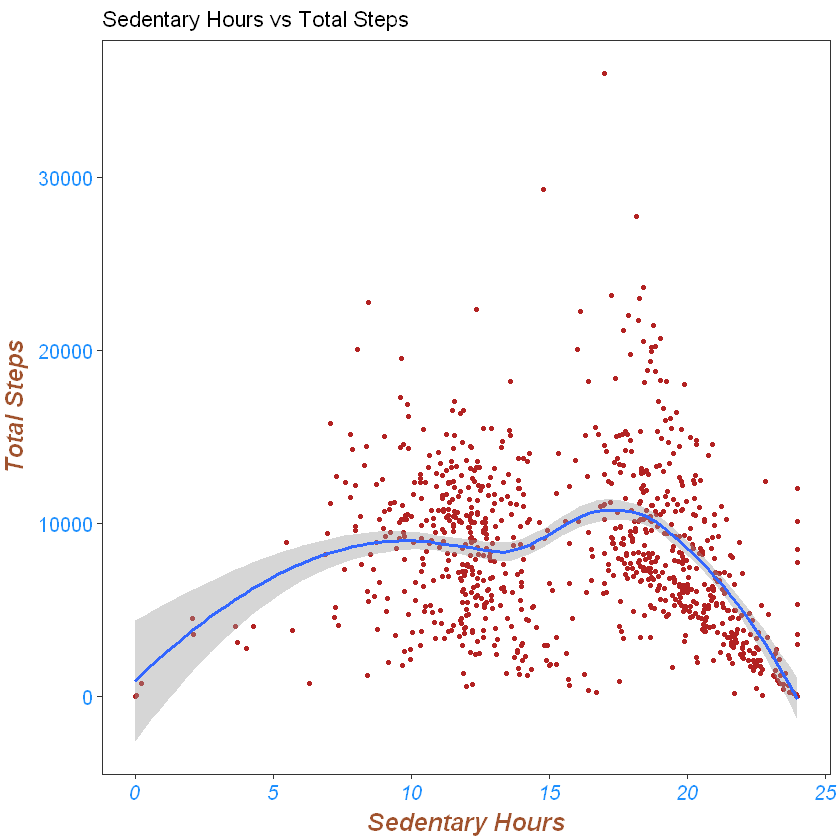

In [99]:
# steps taken and sedentary minutes

ggplot(data = daily_activity_cleaned, aes(y = total_steps, x = (sedentary_minutes) / 60)) +
    geom_point(col = "firebrick", size = 1) +
    geom_smooth() +
    theme_set(theme_bw()) +
    labs(
        x = "Sedentary Hours", y = "Total Steps",
        title = "Sedentary Hours vs Total Steps"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_text(vjust = 0, size = 15),
        axis.title.y = element_text(vjust = 2, size = 15),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_text(color = "dodgerblue", size = 12),
        axis.text.x = element_text(face = "italic")
    )



Looking at the graph, you can see that the data is concentrated into the bottom right quadrant and shows a negative correlation, which makes sense as less steps would indeed mean more sedentary hours. 

There's multiple outliers which could be the result of users taking off their FitBit during the day or while sleeping, or forgetting to charge it.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


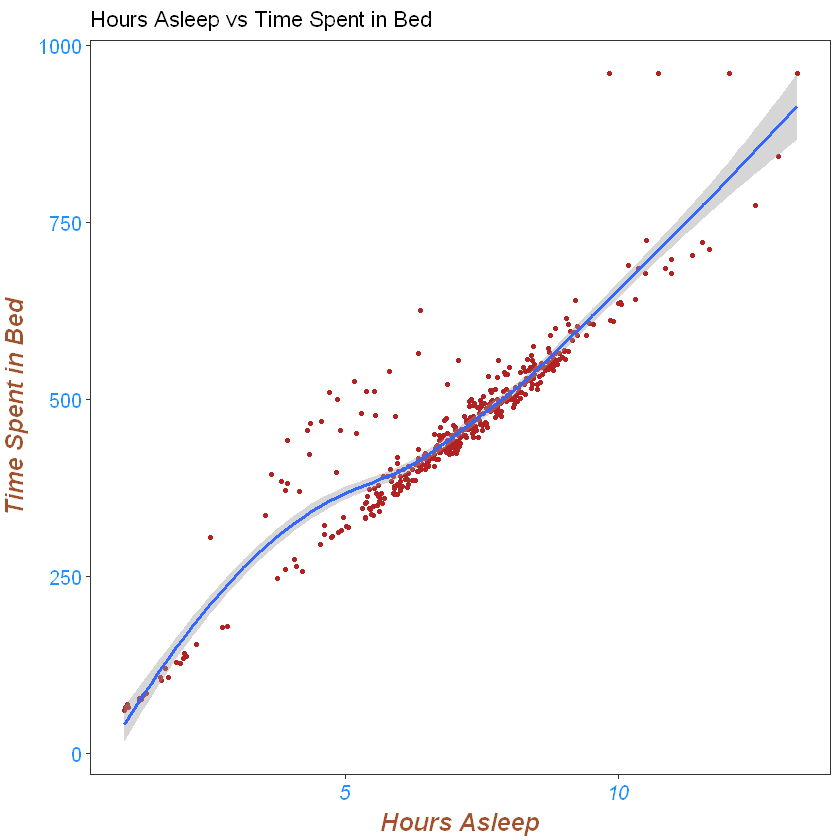

In [112]:
ggplot(data = daily_sleep_cleaned, aes(x = (total_minutes_asleep)/60, y = total_time_in_bed)) +
    geom_point(col = "firebrick", size = 1) +
    geom_smooth() +
    theme_set(theme_bw()) +
    labs(
        x = "Hours Asleep", y = "Time Spent in Bed",
        title = "Hours Asleep vs Time Spent in Bed"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_text(vjust = 0, size = 15),
        axis.title.y = element_text(vjust = 2, size = 15),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_text(color = "dodgerblue", size = 12),
        axis.text.x = element_text(face = "italic")
    )


We can see that time in bed and minutes asleep has a strong positive correlation.

However, there are outliers and exceptions. By tracking this data for you, the FitBit device can warn users of an irregular sleep schedule  or insomnia.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


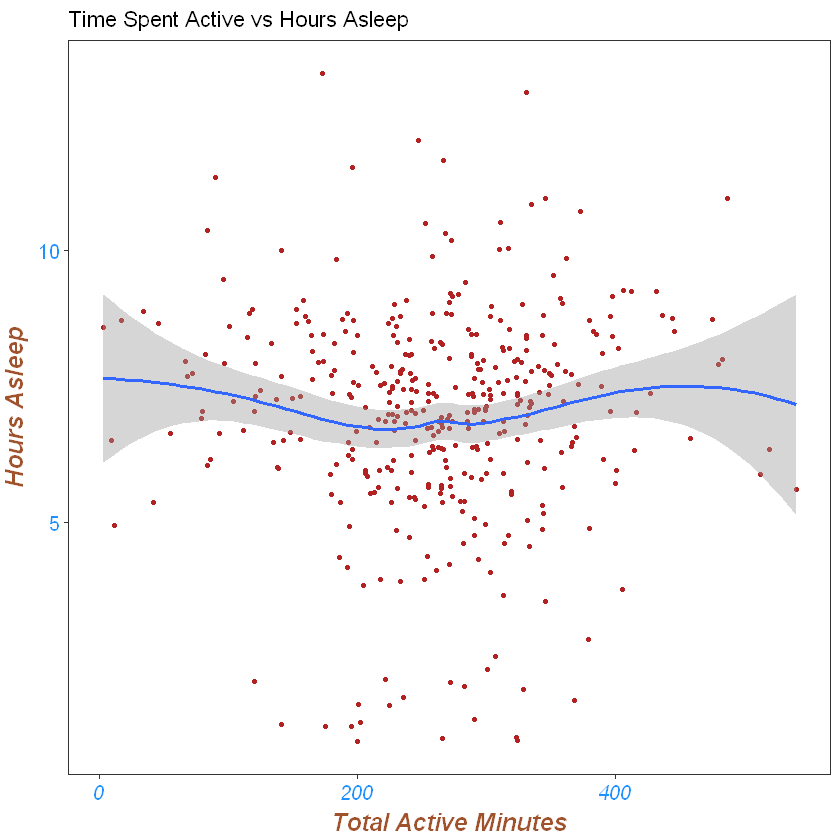

In [113]:
ggplot(data = combined_data, aes(x = total_active_minutes, y = (total_minutes_asleep / 60))) +
    geom_point(col = "firebrick", size = 1) +
    geom_smooth() +
    theme_set(theme_bw()) +
    labs(
        x = "Total Active Minutes", y = "Hours Asleep",
        title = "Time Spent Active vs Hours Asleep"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_text(vjust = 0, size = 15),
        axis.title.y = element_text(vjust = 2, size = 15),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_text(color = "dodgerblue", size = 12),
        axis.text.x = element_text(face = "italic")
    )


Next I wanted to see if there was any relation between active time and duration of sleep. The graph shows no clear correlation, however quantity of sleep isn't the same as quality of sleep. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


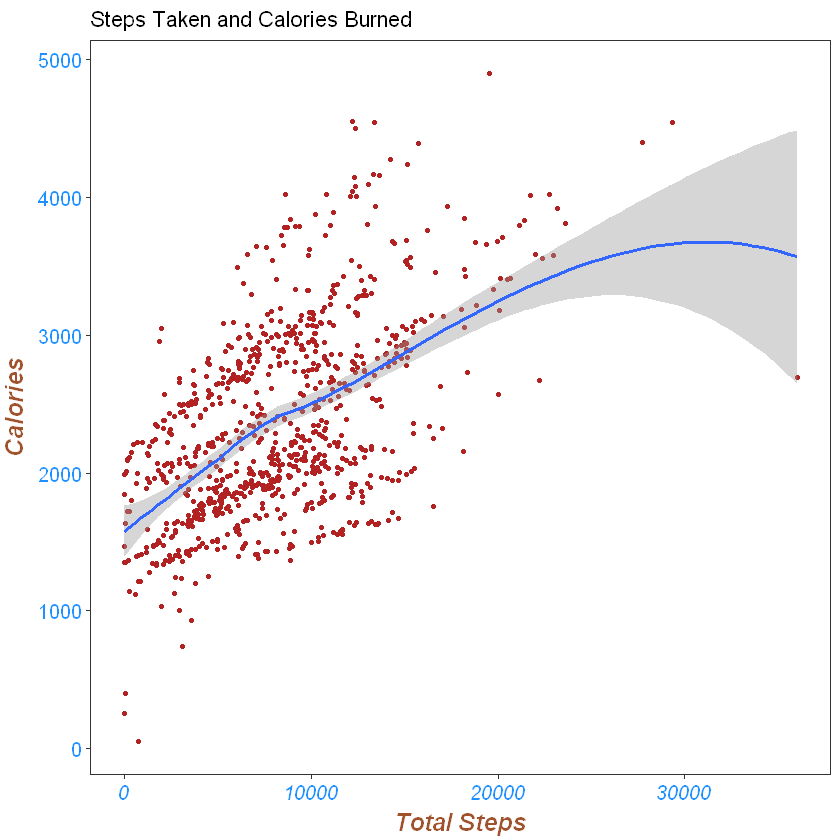

In [114]:
ggplot(data = daily_activity_cleaned, aes(x = total_steps, y = calories)) +
    geom_point(col = "firebrick", size = 1) +
    geom_smooth() +
    theme_set(theme_bw()) +
    labs(
        x = "Total Steps", y = "Calories",
        title = "Steps Taken vs Calories Burned"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_text(vjust = 0, size = 15),
        axis.title.y = element_text(vjust = 2, size = 15),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_text(color = "dodgerblue", size = 12),
        axis.text.x = element_text(face = "italic")
    )


Next I chose to look at the correlation between steps taken and calories burned. It would make sense to expect a strong positive correlation, and I wanted to see if the data matched the hypothesis and if there were any unexpected trends.

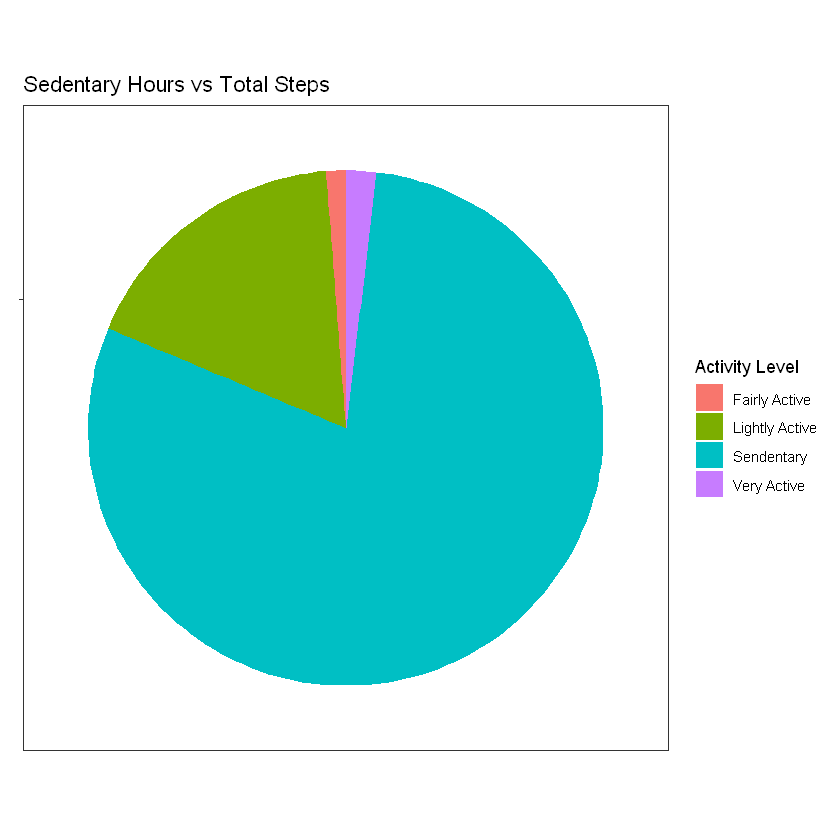

In [132]:
total <- sum(daily_activity_cleaned$very_active_minutes) +
    sum(daily_activity_cleaned$lightly_active_minutes) +
    sum(daily_activity_cleaned$fairly_active_minutes) +
    sum(daily_activity_cleaned$sedentary_minutes)


x <- c(
    (sum(daily_activity_cleaned$very_active_minutes) / total) * 100,
    (sum(daily_activity_cleaned$lightly_active_minutes) / total) * 100,
    (sum(daily_activity_cleaned$fairly_active_minutes) / total) * 100,
    (sum(daily_activity_cleaned$sedentary_minutes) / total) * 100
)

pie_chart_labels <- c("Very Active", "Lightly Active", "Fairly Active", "Sendentary")

data <- data.frame(pie_chart_labels, x)

ggplot(data, aes(x = "", y = x, fill = pie_chart_labels)) +
    geom_col() +
    coord_polar(theta = "y") +
    theme_void() +
    theme(legend.position = "left", legend.title = element_blank(), ) +
    theme_set(theme_bw()) +
    labs(
        x = element_blank(), y = element_blank(), fill = "Activity Level",
        title = "Sedentary Hours vs Total Steps"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_blank()
    )


This visual demonstrates the gulf between sedentary time and active time, being over 75% of the total. And of the active time, light activity is the most dominant.

In [133]:
weekday_steps <- daily_activity_cleaned %>%
    mutate(weekday = weekdays(date))
weekday_steps$weekday <- ordered(weekday_steps$weekday, levels = c(
    "Monday", "Tuesday", "Wednesday", "Thursday",
    "Friday", "Saturday", "Sunday"
))
weekday_steps <- weekday_steps %>%
    group_by(weekday) %>%
    summarize(daily_steps = mean(total_steps))


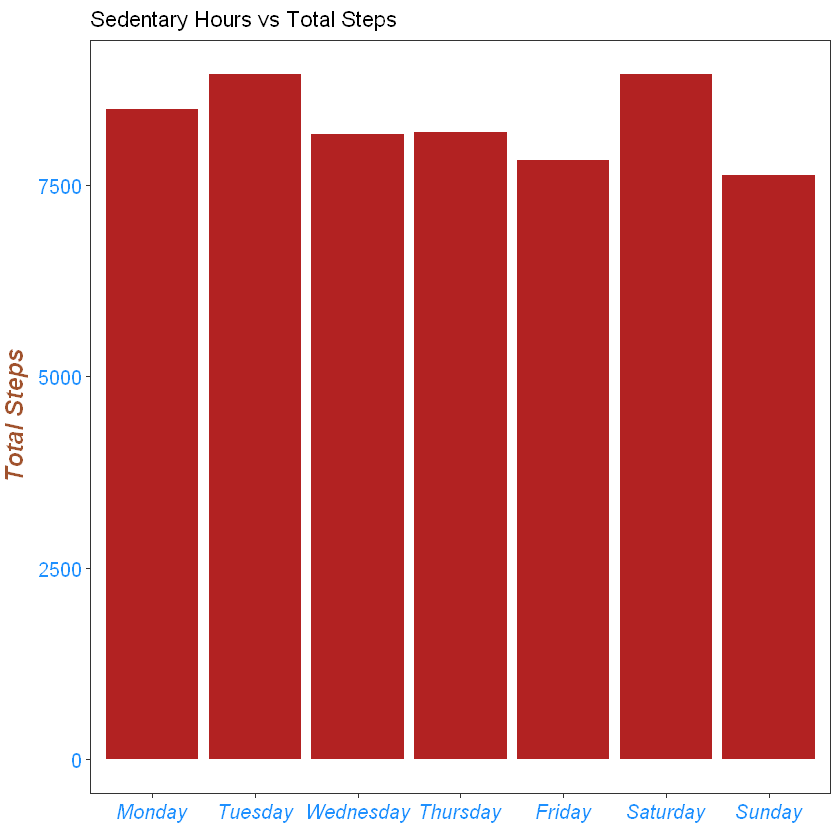

In [120]:
ggplot(weekday_steps, aes(weekday, daily_steps)) +
    geom_col(fill = "firebrick") +
    theme(legend.position = "left", legend.title = element_blank(), ) +
    theme_set(theme_bw()) +
    labs(
        x = element_blank(), y = "Total Steps",
        title = "Sedentary Hours vs Total Steps"
    ) +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_text(vjust = 0, size = 15),
        axis.title.y = element_text(vjust = 2, size = 15),
        axis.title = element_text(
            size = 15, color = "sienna",
            face = "bold.italic"
        ),
        axis.text = element_text(color = "dodgerblue", size = 12),
        axis.text.x = element_text(face = "italic")
    )


We see that Tuesdays and Saturdays record the most steps, and Sunday having the least.


## **6. Act**

Conclusions based on my analysis:

- Most users spend their time in a sedentary state, on average around 12 hours a day. Four hours are spent in total being active, and of that, 3.5 hours are fairly light activities.
- Sleep activity wasn't as well recorded as activity during the day.
- Weight didn't have many records as it required another wireless device or a manual entry. 
- Saturday is the most active day, Sunday is the least active.
- No clear relationship could be drawn between activity and time spent asleep.

While the quality of data was low, it does not have any unexpected trends that are beyond reason. Therefore, the data can be used to draw some overall conclusions that should be backed up with further analysis of a dataset that centres around Bellabeat's target audience of women.

Daily activity had almost double the observations as sleep activity. This could imply a user preference towards wearing their devices during the day and taking them off at night. 

The smart device usage suggests that users spend more time in sedentary than they might be aware. This implies that users spend their device during activities like commuting or running errands.

Users are more likely to track when its invisible, automatic. This would be a prominent feature for any product as opposed to giving them a new chore of manual entry.

Users were found to spend around 39 minutes in bed while not asleep. The Bellabeat app could detect this and gently remind users with a notification.